In [12]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Параметр үшін күту функциясы
def wait_for(driver, by, value, timeout=5):
    WebDriverWait(driver, timeout).until(EC.presence_of_element_located((by, value)))

# Chrome параметрлері
options = Options()
options.add_argument("--headless")  # Браузерсіз режим
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

# ChromeDriver жолын көрсету
service = Service(r"C:\Users\14ken\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe")
driver = webdriver.Chrome(service=service, options=options)

# Сайттың негізгі URL-сі
url_base = "https://krisha.kz/prodazha/kvartiry/almaty/?page="
data_list = []  # Мәліметтер тізімі
pages = 16  # Парақтар саны

for page in range(1, pages + 1): 
    url = url_base + str(page)

    driver.get(url)
    time.sleep(2)  # Парақтың жүктелуін күту

    # Элементтерді күту
    wait_for(driver, By.CLASS_NAME, "a-card")

    soup = BeautifulSoup(driver.page_source, "html.parser")
    listings = soup.find_all("div", class_="a-card")

    for listing in listings:
        try:
            # Пәтер туралы негізгі мәліметтерді алу
            link = "https://krisha.kz" + listing.find("a", class_="a-card__title")["href"]
            title = listing.find("a", class_="a-card__title").text.strip()
            price = listing.find("div", class_="a-card__price").text.strip() if listing.find("div", class_="a-card__price") else "Н/Д"
            location = listing.find("div", class_="a-card__subtitle").text.strip() if listing.find("div", class_="a-card__subtitle") else "Н/Д"
            
            # Мәліметтерді тізімге қосу
            data_list.append([title, price, location, link])

        except Exception as e:
            print(f"Қате: {e}")
            continue

# Браузерді жапу
driver.quit()

# Мәліметтерді DataFrame форматына келтіру
df = pd.DataFrame(data_list, columns=["Название", "Цена", "Адрес", "Ссылка"])


# Сохранение данных в CSV
df.to_csv('data.csv', index=False, encoding="utf-8")

# Вывод первых нескольких строк
print(df.head())


                                   Название             Цена  \
0  4-комнатная квартира · 100 м² · 5/5 этаж     71 000 000 〒   
1          3-комнатная квартира · 109.59 м²  от 73 973 250 〒   
2           3-комнатная квартира · 81.58 м²  от 57 269 160 〒   
3  2-комнатная квартира · 90 м² · 5/13 этаж     70 000 000 〒   
4           3-комнатная квартира · 80.91 м²  от 57 203 370 〒   

                                       Адрес  \
0  Бостандыкский р-н, Сатпаева 56 — Айманова   
1    Турксибский р-н, Кульджинский тр-т 80/1   
2    Турксибский р-н, Кульджинский тр-т 80/1   
3             Ауэзовский р-н, мкр Мамыр-7 21   
4    Турксибский р-н, Кульджинский тр-т 80/1   

                               Ссылка  
0  https://krisha.kz/a/show/684969884  
1  https://krisha.kz/a/show/760760842  
2  https://krisha.kz/a/show/760760837  
3  https://krisha.kz/a/show/666519900  
4  https://krisha.kz/a/show/760760836  


In [13]:
import pandas as pd

# 1. Мәліметтерді жүктеу
data = pd.read_csv('data.csv')

# Мәліметтердің құрылымын тексереміз
print("Мәліметтерді тексеру:")
print(data.info())


Мәліметтерді тексеру:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Название  323 non-null    object
 1   Цена      323 non-null    object
 2   Адрес     323 non-null    object
 3   Ссылка    323 non-null    object
dtypes: object(4)
memory usage: 10.2+ KB
None


In [14]:
# 2. Пропущенные мәндерді тексеру
print("\nПропущенные мәндер саны:")
print(data.isnull().sum())



Пропущенные мәндер саны:
Название    0
Цена        0
Адрес       0
Ссылка      0
dtype: int64


In [15]:
# 'Цена' бағанында қате символдарды алып тастаймыз
data['Цена'] = data['Цена'].replace({'\xa0': '', '〒': '', 'от': ''}, regex=True)

# Бағандағы деректер типін тексереміз
data['Цена'] = pd.to_numeric(data['Цена'], errors='coerce')

# Мәліметтерді тексереміз
print(data.head())  # Бастапқы деректерді шығару

# Мәліметтер туралы толық ақпарат
print("\n'Цена' бағаны түзетілгеннен кейін:")
print(data.info())



                                   Название      Цена  \
0  4-комнатная квартира · 100 м² · 5/5 этаж  71000000   
1          3-комнатная квартира · 109.59 м²  73973250   
2           3-комнатная квартира · 81.58 м²  57269160   
3  2-комнатная квартира · 90 м² · 5/13 этаж  70000000   
4           3-комнатная квартира · 80.91 м²  57203370   

                                       Адрес  \
0  Бостандыкский р-н, Сатпаева 56 — Айманова   
1    Турксибский р-н, Кульджинский тр-т 80/1   
2    Турксибский р-н, Кульджинский тр-т 80/1   
3             Ауэзовский р-н, мкр Мамыр-7 21   
4    Турксибский р-н, Кульджинский тр-т 80/1   

                               Ссылка  
0  https://krisha.kz/a/show/684969884  
1  https://krisha.kz/a/show/760760842  
2  https://krisha.kz/a/show/760760837  
3  https://krisha.kz/a/show/666519900  
4  https://krisha.kz/a/show/760760836  

'Цена' бағаны түзетілгеннен кейін:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 

In [16]:
# 5. Пропущенные мәндерді медианамен толтыру
data['Цена'] = data['Цена'].fillna(data['Цена'].median())

# Мәліметтерді тексереміз
print("\n'Цена' бағаны медианамен толтырылғаннан кейін:")
print(data.head())



'Цена' бағаны медианамен толтырылғаннан кейін:
                                   Название      Цена  \
0  4-комнатная квартира · 100 м² · 5/5 этаж  71000000   
1          3-комнатная квартира · 109.59 м²  73973250   
2           3-комнатная квартира · 81.58 м²  57269160   
3  2-комнатная квартира · 90 м² · 5/13 этаж  70000000   
4           3-комнатная квартира · 80.91 м²  57203370   

                                       Адрес  \
0  Бостандыкский р-н, Сатпаева 56 — Айманова   
1    Турксибский р-н, Кульджинский тр-т 80/1   
2    Турксибский р-н, Кульджинский тр-т 80/1   
3             Ауэзовский р-н, мкр Мамыр-7 21   
4    Турксибский р-н, Кульджинский тр-т 80/1   

                               Ссылка  
0  https://krisha.kz/a/show/684969884  
1  https://krisha.kz/a/show/760760842  
2  https://krisha.kz/a/show/760760837  
3  https://krisha.kz/a/show/666519900  
4  https://krisha.kz/a/show/760760836  


In [17]:
import numpy as np

# Райондарды кодтау
raion = {
    "Алатауский": 1, "Алмалинский": 2, "Ауэзовский": 3, "Бостандыкский": 4,
    "Жетысуский": 5, "Медеуский": 6, "Наурызбайский": 7, "Турксибский": 8
}

# Райондарды кодтау функциясы
def codirovka(address):
    address_str = str(address).lower()  # Мәтінді кіші әріптерге ауыстыру
    for district in raion.keys():
        if district.lower() in address_str:  # Егер аудан мекен-жайда болса
            return raion[district]
    return np.nan  # Аудан табылмаса, NaN қайтару

# "Адрес" бағанына кодтау қолдану
data["Район"] = data["Адрес"].apply(codirovka)

# Санға түрлендіру (NaN мәндерімен жұмыс жасау үшін 'Int64' қолданылады)
data['Район'] = data['Район'].astype('Int64')

# Нәтижені тексеру
print(data.head())



                                   Название      Цена  \
0  4-комнатная квартира · 100 м² · 5/5 этаж  71000000   
1          3-комнатная квартира · 109.59 м²  73973250   
2           3-комнатная квартира · 81.58 м²  57269160   
3  2-комнатная квартира · 90 м² · 5/13 этаж  70000000   
4           3-комнатная квартира · 80.91 м²  57203370   

                                       Адрес  \
0  Бостандыкский р-н, Сатпаева 56 — Айманова   
1    Турксибский р-н, Кульджинский тр-т 80/1   
2    Турксибский р-н, Кульджинский тр-т 80/1   
3             Ауэзовский р-н, мкр Мамыр-7 21   
4    Турксибский р-н, Кульджинский тр-т 80/1   

                               Ссылка  Район  
0  https://krisha.kz/a/show/684969884      4  
1  https://krisha.kz/a/show/760760842      8  
2  https://krisha.kz/a/show/760760837      8  
3  https://krisha.kz/a/show/666519900      3  
4  https://krisha.kz/a/show/760760836      8  


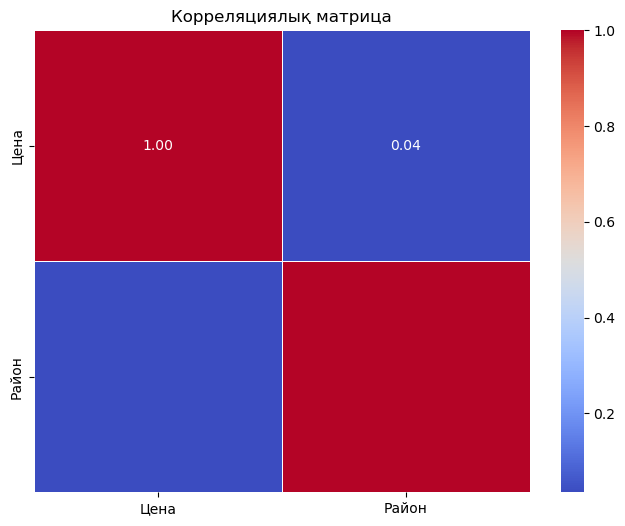

In [18]:
# Корреляциялық талдау – екі немесе одан да көп айнымалылар арасындағы байланысты зерттейтін статистикалық әдіс. Ол бір айнымалының өзгеруі екіншісіне қалай әсер ететінін анықтауға көмектеседі.
correlation_matrix = data[['Цена', 'Район']].corr()   #±1-ге жақын болса, байланыс күшті.

# Корреляциялық матрицаны визуализациялау
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляциялық матрица')
plt.show()


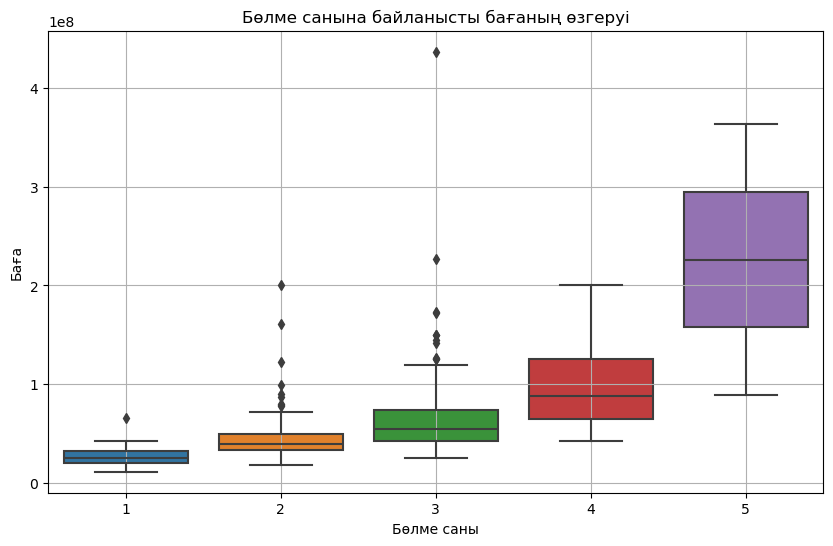

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Бөлме саны бағанын алу (мысалы, бірінші сөзді алу)
data["Бөлме саны"] = data["Название"].str.extract(r"(\d+)-комнатная").astype("Int64")

# Боксплот салу
plt.figure(figsize=(10, 6))
sns.boxplot(x=data["Бөлме саны"], y=data["Цена"])
plt.xlabel("Бөлме саны")
plt.ylabel("Баға")
plt.title("Бөлме санына байланысты бағаның өзгеруі")
plt.grid()
plt.show()


In [20]:
# Баған атауларын шығару
print(data.columns)


Index(['Название', 'Цена', 'Адрес', 'Ссылка', 'Район', 'Бөлме саны'], dtype='object')


In [21]:
data.dropna(subset=["Район"], inplace=True)  # Удалить строки с NaN в столбце 'Район'
data["Район"].fillna("Неизвестно", inplace=True)  # Заполнить пропущенные значения в 'Район' строкой


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Кодируем категориальные переменные (например, Район и Адрес)
encoder = LabelEncoder()
data['Район'] = encoder.fit_transform(data['Район'])
data['Адрес'] = encoder.fit_transform(data['Адрес'])

# X - Бұл тәуелсіз айнымалылар (немесе белгілер), y - тәуелді айнымалы (болжанатын мәндер)
X = data[['Адрес', 'Бөлме саны', 'Район']]  # Айнымалылар
y = data['Цена']  # Баға (Целевая переменная)

# Тренировка және тест жиынтығына бөлу (80% - тренировка, 20% - тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Мәліметтерді тексереміз
print(f"Train data size: {X_train.shape}")
print(f"Test data size: {X_test.shape}")



Train data size: (248, 3)
Test data size: (63, 3)


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

# Кодируем категориальные переменные (например, Район и Адрес) с помощью LabelEncoder
encoder = LabelEncoder()
data['Район'] = encoder.fit_transform(data['Район'])
data['Адрес'] = encoder.fit_transform(data['Адрес'])

# Признаки (независимые переменные)
X = data[['Район', 'Бөлме саны', 'Адрес']]  # Признаки

# Целевая переменная (цена)
y = data['Цена']  # Цена (целевой столбец)

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование и оценка качества модели
y_pred = model.predict(X_test)

# Оценка качества модели (MAE - средняя абсолютная ошибка)
mae = mean_absolute_error(y_test, y_pred)
print(f"📉 MAE: {mae:,.0f} тенге")


📉 MAE: 22,490,682 тенге
